# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов и байесовких методов.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2<font size="5" color="red">\*</font> - 3 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 5 баллов
* Задача 5<font size="5" color="red">\*</font> - 2 балла
* Задача 6 - 4 балла
* Задача 7 - 1 балл
* Задача 8 - 3 балла
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* Задача 10 - 5 баллов
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [106]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

In [10]:
def draw_confidence_interval(left,  # левая граница интервала
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=(None, None)):  # ограничение по оси y
    grid = np.arange(1, 101)
    plt.figure(figsize=(15, 8))
    if sample is not None:
        plt.scatter(grid, sample, alpha=0.2, s=40, label='sample')
    if estimation is not None:
        plt.plot(grid, estimation, color='red', linewidth=2.5, label='estimation')
    plt.fill_between(grid, right, left, alpha=0.15, label='confidence interval')
    plt.legend()
    plt.ylim(ylim)    
    plt.grid(ls=':')
    plt.show()

Сгенерируйте выборки и постройте графики доверительных интервалов по следующей схеме.
* Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.
* Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно.
* Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.
* Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.


Генерировать выборки размера 100, уровень доверия брать $\alpha=0.95$. Для вычисления квантилей у каждого распределения из `scipy.stats` есть функция `ppf`.

Сделайте вывод. Насколько часто истинное значение параметра попадает в доверительный интервал? Как длина интервала зависит от размера выборки?

In [135]:
size = 100
alpha = 0.95

$\overline{X} - \frac{u_\frac{1+\alpha}{2}}{\sqrt{n}} < \theta < \overline{X} - \frac{u_\frac{1-\alpha}{2}}{\sqrt{n}}$ -- доверительный интервал для нормального распределения $\mathcal{N}(\theta, 1)$

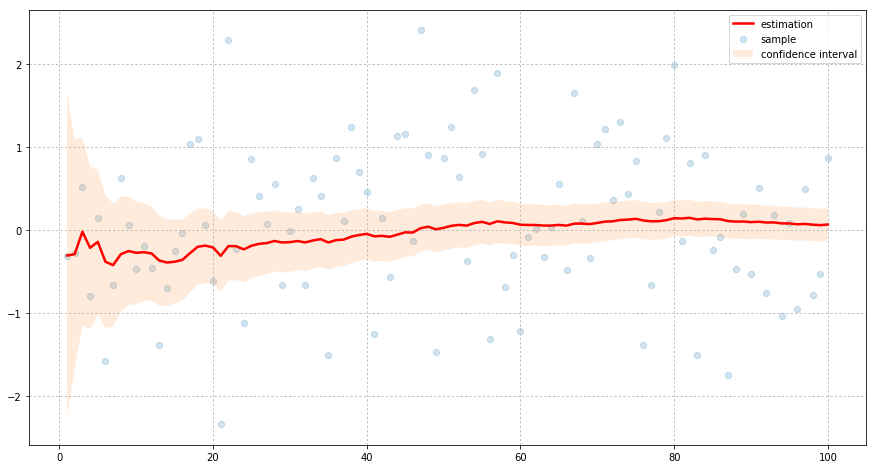

In [136]:
sample = sps.norm.rvs(loc=0, scale=1, size=size)
n = np.arange(1, size + 1)
cumsum = sample.cumsum() / n
left = cumsum - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)
right = cumsum - sps.norm.ppf((1 - alpha) / 2) / np.sqrt(n)

draw_confidence_interval(left=left, right=right, sample=sample, estimation=cumsum)

$X_{(n)} < \theta < \dfrac{X_{(n)}}{\sqrt[n]{1 - \alpha}}$ -- доверительный интервал для $U[0, \theta]$

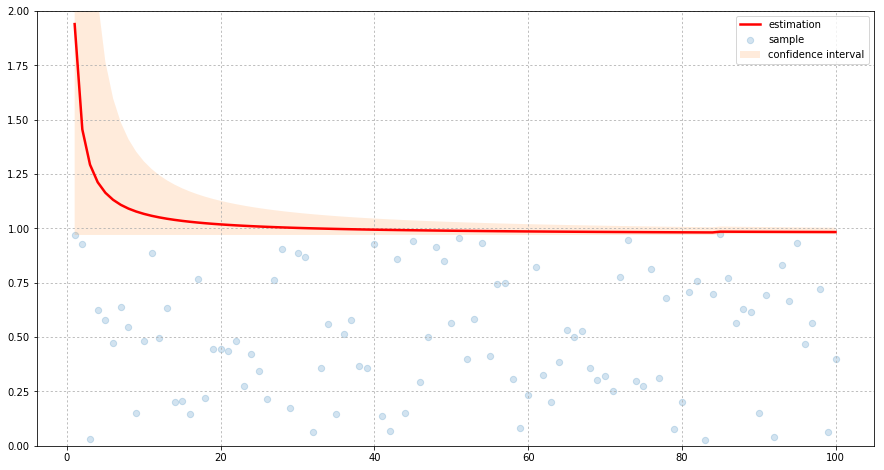

In [138]:
sample = sps.uniform.rvs(size=size)
left = np.maximum.accumulate(sample)
right = left * ((1. - alpha) ** (-1./ n))
estimation = np.arange(2, 102) / n * left

draw_confidence_interval(left=left, right=right, sample=sample, estimation=estimation, ylim=(0,2))

$\dfrac{2}{\overline{X}} + \dfrac{\sqrt{\frac{2}{n}} u_{\frac{1 - \alpha}{2}}}{\overline{X}} < \theta < \dfrac{2}{\overline{X}} + \dfrac{\sqrt{\frac{2}{n}} u_{\frac{1 + \alpha}{2}}}{\overline{X}} $ -- доверительный интервал для $\Gamma(\theta, 2)$

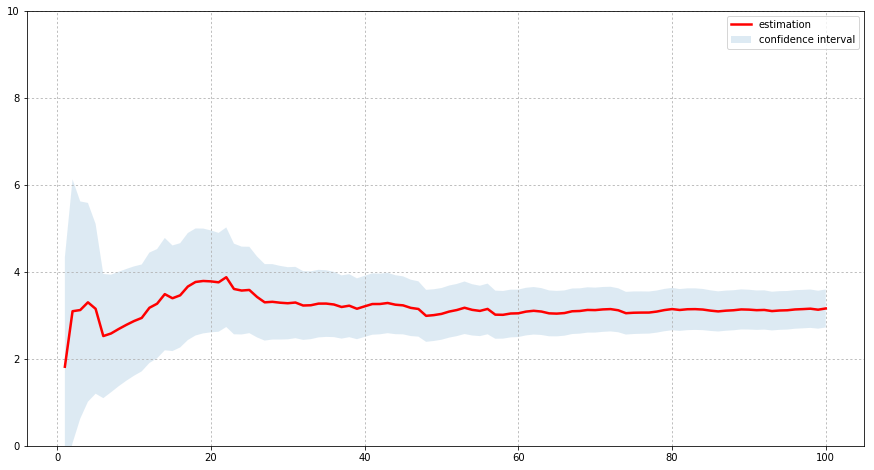

In [140]:
sample = sps.gamma.rvs(a=2, scale=1/3, size=size)
cumsum = np.cumsum(sample) / n
left = 2 / cumsum + np.sqrt(2 / n) * sps.norm.ppf((1 - alpha) / 2) / cumsum
right = 2 / cumsum + np.sqrt(2 / n) * sps.norm.ppf((1 + alpha) / 2) / cumsum
estimation = 2 / cumsum

draw_confidence_interval(left=left, right=right, estimation=estimation, ylim=(0,10))

$\dfrac{\hat{\mu}}{n}$ $+ \dfrac{\pi u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}} < \theta < \dfrac{\hat{\mu}}{n}$ $+ \dfrac{\pi u_{\frac{1 - \alpha}{2}}}{2 \sqrt{n}} $ -- доверительный интервал для стандартного распределения Коши

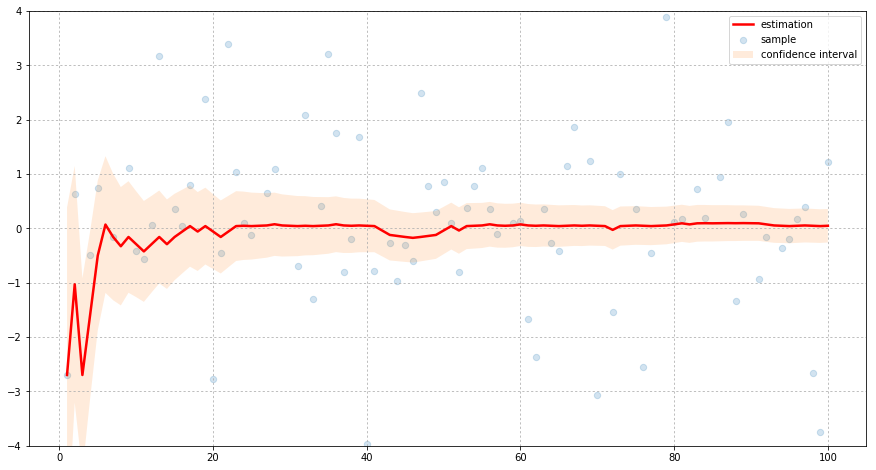

In [141]:
sample = sps.cauchy.rvs(size=size)
cum_median = np.vectorize(lambda i: np.median(sample[:i]))(np.arange(1,101))

left = cum_median - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(n))
right = cum_median - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(n))

draw_confidence_interval(left=left, right=right, sample=sample, ylim=(-4, 4), estimation=cum_median)

$\overline{X} - \dfrac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}} < \theta < \overline{X} + \dfrac{u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}$ -- доверительный интервал

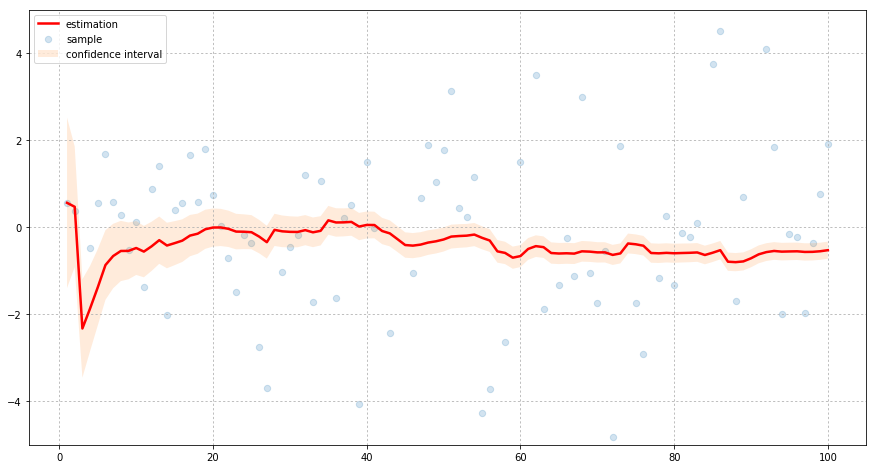

In [142]:
sample = sps.cauchy.rvs(size=100)
cumsum = sample.cumsum() / n
left = cumsum - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)
right = cumsum + sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n)

draw_confidence_interval(left, right, sample=sample, ylim=(-5,5), estimation=cumsum)

**Вывод:** Насколько часто истинное значение параметра попадает в доверительный интервал? 

По графикам можно видеть, что истинное значение параметра всегда содержится в доверительном интервале.

Как длина интервала зависит от размера выборки? Чем больше выборка, тем уже становится интервал (что логично, поскольку можно точнее оценить параметр при бОльшем размере выборки)

**Задача 2<font size="5" color="red">\*</font>.** 
Аналогично заданию 1 постройте доверительные интервалы для следующих случаев
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
* Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал для $\beta$ в модели $\Gamma(\theta, \beta)$, причем $\theta$ неизвестно; точки выборки наносить на график не нужно.

**Задача 3<font size="5" color="red">\*</font>.** 
Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

In [157]:
size = 300
K = 10 ** 5

In [146]:
def draw_empirical_function(T1, label1, ylim, T2=None, label2=None):
    plt.figure(figsize=(15, 8))
    grid = np.arange(1, size + 1)
    if T2 is not None:
        E2 = [sps.kstest(T2[x], 'norm').statistic for x in range(size)]
        plt.plot(grid, E2, color='orange', label=label2)
    
    E1 = [sps.kstest(T1[x], 'norm').statistic for x in range(size)]
    plt.plot(grid, E1, color='lightgreen', label=label1)    
    
    plt.ylim(ylim)
    plt.grid(ls=':')
    plt.legend()
    plt.show()


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


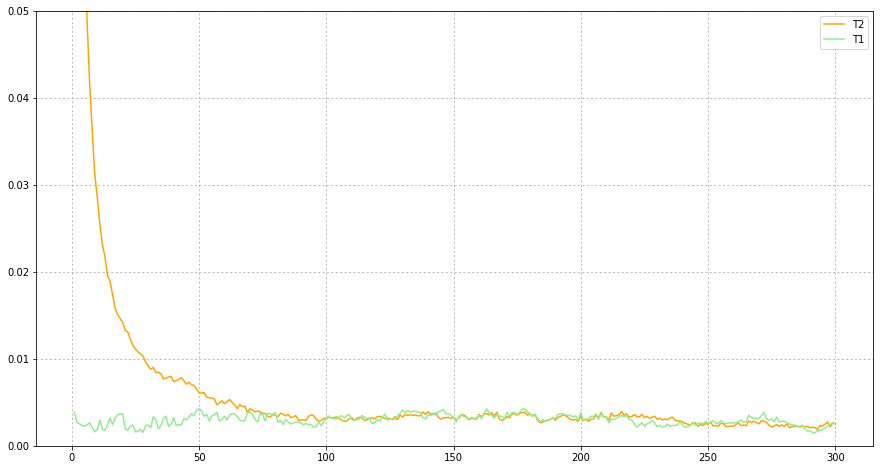

In [167]:
n = np.arange(1, size + 1)
sample = np.array([sps.norm.rvs(size=size) for i in range(K)])
T1 = np.array([(sample[i].cumsum() / n) * np.sqrt(n) for i in range(K)])
T2 = np.array([T1[i] / np.sqrt((sample[i] ** 2).cumsum() / n - ((sample[i].cumsum()) / n) ** 2) for i in range(K)])
T1 = np.transpose(T1)
T2 = np.transpose(T2)

draw_empirical_function(T1=T1, T2=T2, ylim=(0,0.05), label1='T1', label2='T2')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


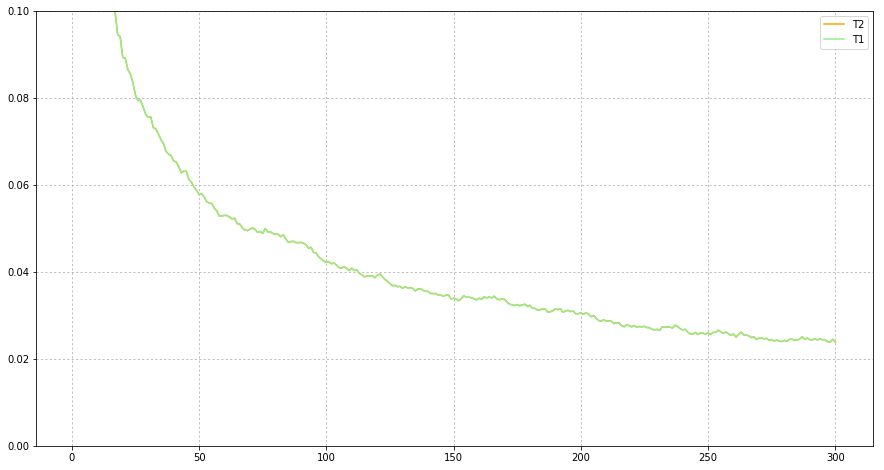

In [168]:
p = 0.5
sample = [sps.bernoulli(p).rvs(size=size) for i in range(K)]
T1 = np.array([np.sqrt(n) * (np.cumsum(sample[i]) / n - p) / np.sqrt(p * (1 - p)) for i in range(K)])
T2 = np.array([np.sqrt(n) * (np.cumsum(sample[i]) / n - p) / np.sqrt(np.cumsum(sample[i] ** 2) / n - (np.cumsum(sample[i]) / n) ** 2) for i in range(K)])
T1 = np.transpose(T1)
T2 = np.transpose(T2)

draw_empirical_function(T1=T1, T2=T2, ylim=(0,0.1), label1 = 'T1', label2 = 'T2')

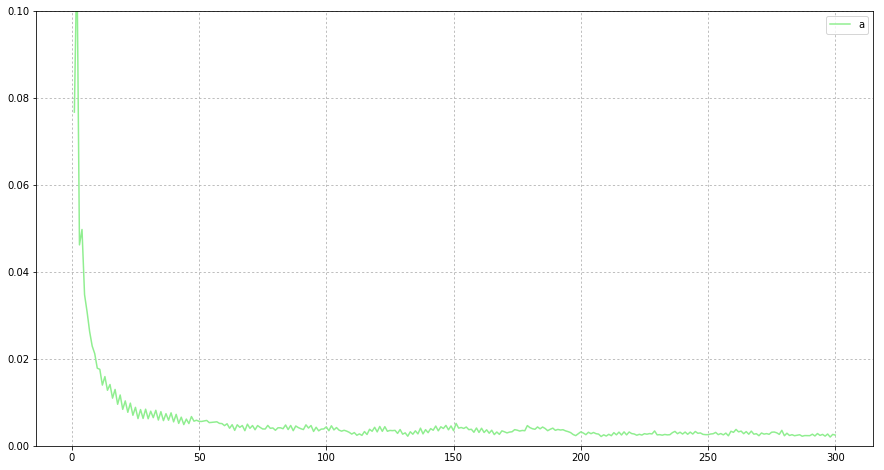

In [162]:
n = np.arange(1, 301)
sample = sps.cauchy.rvs(size=(K, size))
T = np.array([np.sqrt(i) * np.median(sample[:, :i], axis=1) / (np.pi / 2) for i in range(1, 301)])
draw_empirical_function(T, label1 = 'a', ylim=(0,0.1))

**Вывод:** Как можно видеть из первого графика, распределение статистики $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$ лучше приближается нормальным распределением. Во втором случае ничего сказать нельзя, т.к. графики буквально наложены друг на друга. При размере выборки 50 и больше, как видно из графика, функция $D_n$ принимает очень маленькие значения, следовательно, можно пользоваться приближением нормальным распределением.

**Задача 5<font size="5" color="red">\*</font>.** 
Проведите исследование аналогичное задаче 4 для статистик из задачи 2.

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [ ]:
def normal_summary(sample):
    print('size: %d' % ...)
    print('sample mean: %.2f' % ...)
    print('sample median: %.2f' % ...)
    print('sample std: %.2f' % ...)  # стандартное отклонение = корень из дисперсии
    print('0.95 confidence interval: (%.2f, %.2f)' % (..., ...))
    print('KS-stat: %.3f' % ...)  # значение статистики из теоремы Колмогорова-Смирнова,
                                  # взяв в качестве F функцию распределения нормального
                                  # распределения с оцененными выше параметрами

Протестируйте функцию на выборках из нормального распределения и на выборках из других распределений. Какой вывод можно сделать о поведении статистики Колмогорова-Смирнова?

Скачайте данные http://archive.ics.uci.edu/ml/datasets/Wine, файл `wine.data`.
Что вы можете сказать про столбцы 1, 4, 8 (нумерация с нуля), соответсвующие 'Alcohol', 'Alcalinity of ash', 'Nonflavanoid phenols'?

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую можификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

Ниже приведена реализация некоторых вспомогательных функций.

In [ ]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [ ]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    ...
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.
